## Predicting sales from advertising spend using Linear Regression

HINA Inc. is a large FMCG company that is streamlining its marketing budget. This involves taking stock of all its marketing strategies. This, in turn, means re-assessing the effectiveness of its existing spend on various marketing channels. This project explores the relationship between spending money on TV advertising campaigns and levels of sales. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
advertising = pd.read_csv("/content/drive/MyDrive/Marketing-Analytics/Data/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


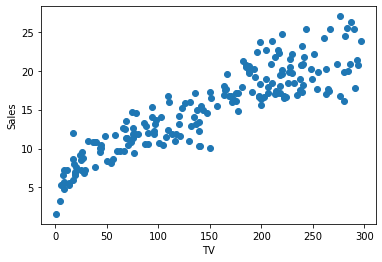

In [ ]:
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression()

#### Plotting the relationship

In [ ]:
sales_pred = lr.predict(advertising[['TV']])

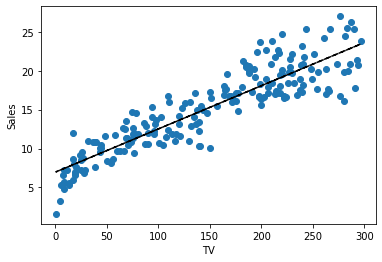

In [ ]:
plt.plot(advertising.TV, sales_pred,"k--")
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

## Creating Features for customer revenue prediction

Azra is a big high-fashion retailer with operations in multiple countries. To optimize their marketing activities, Azra seeks to identify high-value customers – customers that are expected to bring high revenue to the retailer – and have a differential marketing strategy for them.

This section manipulates data and creates variables that will help model the customer spend for the year 2020, based on the past activity. The total customer spends for 2020 will therefore be the dependent variable. The independent variables will be features that capture information about the customer's past purchase behavior. 

About the raw data:
 * Customer identifier (CustomerID)
 * The number of units purchased (Quantity)
 * The date and time of the purchase (InvoiceDate)
 * The unit cost (UnitPrice)
 * Additional information about the item purchased (StockCode, Description) and the customer (Country)

In [ ]:
import pandas as pd
import datetime as dt
df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/azra_retail_transactions.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [ ]:
# change InvoiceDate to datetime object

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# create revenue column

df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [ ]:
# group data by InvoiceNo

operations = {'revenue':'sum', 'InvoiceDate':'first', 'CustomerID':'first'}
df = df.groupby('InvoiceNo').agg(operations)

In [ ]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


In [ ]:
# create year column

df['year'] = df['InvoiceDate'].dt.year

In [ ]:
# calculate how many days' difference there is between the last day of 2019 and the invoice date

df['days_since'] = (dt.datetime(year=2019, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

In [ ]:
# calculate days since the first and last purchase, along with the number of purchases and total revenue for 2019
operations = {'revenue':'sum', 'days_since':['max','min','nunique']}
# predictor variables grouped by CustomerID
X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)

X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [ ]:
# names of the columns

X.columns = [' '.join(col).strip() for col in X.columns.values]

In [ ]:
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [ ]:
# average spend per order

X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

In [ ]:
# sum of revenue for 2020

y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

In [ ]:
# predictors and outcomes into a single DataFrame

wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2019', 'days_since_first_purchase', 'days_since_last_purchase', 'number_of_purchases',\
                       'avg_order_cost', 'revenue_2020']

wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [ ]:
wrangled_df.isnull().sum()

revenue_2019                 3453
days_since_first_purchase    3453
days_since_last_purchase     3453
number_of_purchases          3453
avg_order_cost               3453
revenue_2020                  119
dtype: int64

In [ ]:
# remove null values

wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

In [ ]:
wrangled_df = wrangled_df[wrangled_df.revenue_2020 < ((wrangled_df.revenue_2020.median()) \
               + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 < ((wrangled_df.revenue_2019.median()) \
                 + wrangled_df.revenue_2019.std()*3)]

In [ ]:
wrangled_df.to_csv('wrangled_transactions.csv')
!cp wrangled_transactions.csv "drive/My Drive/datasets/"
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


## Examining Relationships between Predictors and Outcome

Correlation

Correlation coefficients are a quantitative measure that describe the strength of association/relationship between two variables.

$cov(x, y) = \frac{1}{n-1} \Sigma (x_i-\overline{x})(y_i-\overline{y})$

$cor(x,y) = \frac{1}{n-1} \Sigma (\frac{x_i-\overline{x}}{s_x})(\frac{y_i-\overline{y})}{s_y})$

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/wrangled_transactions.csv', index_col='CustomerID')

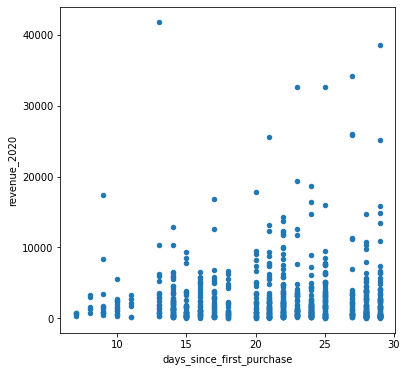

In [ ]:
df.plot.scatter(x="days_since_first_purchase", y="revenue_2020", figsize=[6,6])
plt.show()

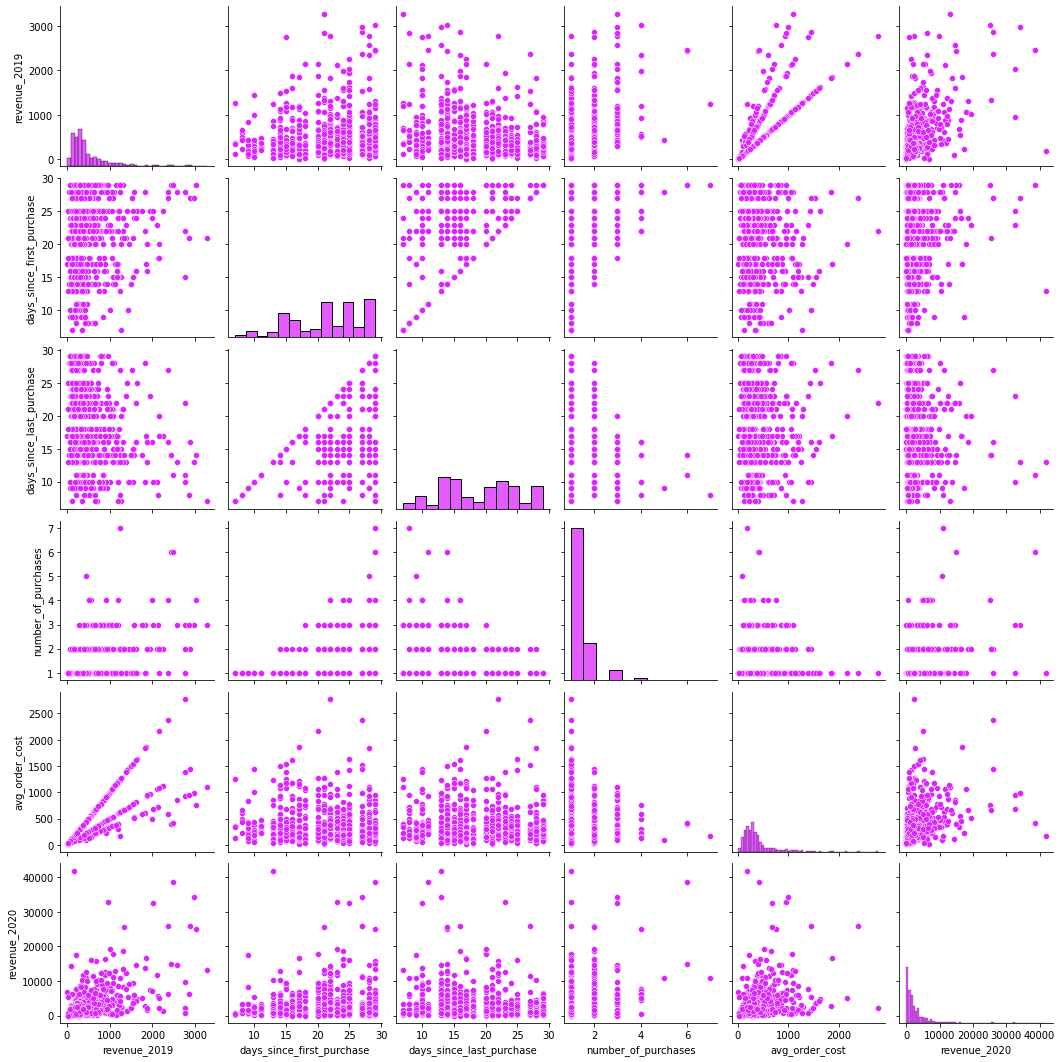

In [ ]:
import seaborn as sns
sns.set_palette('cool_r')
sns.pairplot(df)
plt.show()

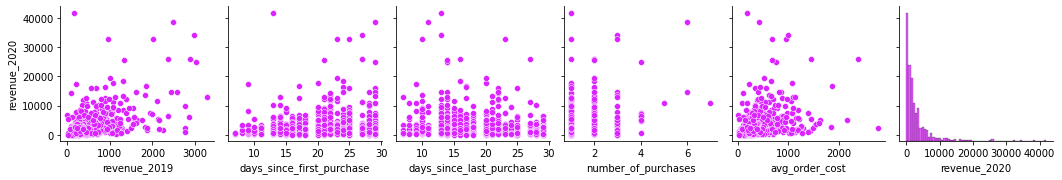

In [ ]:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

In [ ]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Revenue is correlated most with number of purchases and average order cost. 

## Building a Linear Model Predicting Customer Spend

Linear Regression

* simple linear regression model: $y_i = B_0 + B_ix_i + ϵ_i$
* $y_i$ - response variable
* $x_i$ - predictor variable or regressor
* $B_0$ - intercept
* $B_i$ - slope of $x_i$
* $ϵ_i$ - residual ($y_i - \hat y$)

Least-squares estimators
 * $\hat B_1 = \frac{\Sigma(x_i - \overline x)(y_i - \overline y)}{\Sigma(x_i - \overline x)^2}$
 * $\hat B_0 = \overline y - \hat B_1 \overline x$
 * $\sigma^2 = \frac{1}{n-2} \Sigma[y_i - (\hat B_0 + \hat B_1 x_i)]^2$

Prediction line: $\hat y = \hat B_0 + \hat B_1$

Coefficient of determination: $R^2 = \frac{\Sigma(\hat y - \overline y)^2}{(y_i - \overline y)^2}$
* $R^2$ ranges from 0 to 1 and is good (stronger) when closer to 1. This metric measures the percentage of variation explained by the regression line. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/wrangled_transactions.csv', index_col='CustomerID')

In [ ]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [ ]:
X = df[['revenue_2019', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost']]

y = df['revenue_2020']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [ ]:
model.intercept_

264.8693265705965

In [ ]:
# Data prediction

single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([5847.67624446])

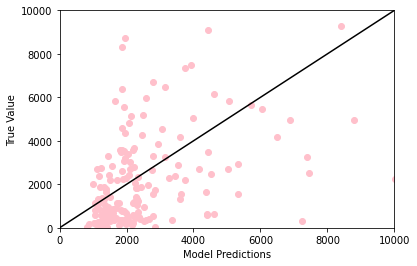

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test), y_test, color='pink')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [ ]:
# correlation between the predicted and the actual values

np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

In [ ]:
# Coefficient of determination: R^2

(np.corrcoef(model.predict(X_test), y_test)[1][0])**2

0.375246914870495